# Data Analysis of Hepitatis C virus

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hc=pd.read_csv('HepatitisData.csv')
hc

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,1,0,0,0,1,1,1,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,0,1,1,0,1,1,0,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,1,1,1,1,0,0,0,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,0,33,0,1,0,1,0,1,0,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,0,0,1,0,1,1,1,...,94,90,30,660410,738756,3731527,338946,242861,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44,1,29,0,1,1,1,0,0,0,...,63,44,45,387795,55938,5,5,5,15,4
1381,55,1,34,0,1,1,0,0,0,0,...,97,64,41,481378,152961,393339,73574,236273,10,2
1382,42,1,26,1,1,0,0,0,1,0,...,87,39,24,612664,572756,806109,343719,160457,6,2
1383,52,1,29,1,0,0,1,1,1,0,...,48,81,43,139872,76161,515730,2460,696074,15,3


In [4]:
hc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Age                               1385 non-null   int64
 1   Gender                            1385 non-null   int64
 2   BMI                               1385 non-null   int64
 3   Fever                             1385 non-null   int64
 4   Nausea/Vomting                    1385 non-null   int64
 5   Headache                          1385 non-null   int64
 6   Diarrhea                          1385 non-null   int64
 7   Fatigue & generalized bone ache   1385 non-null   int64
 8   Jaundice                          1385 non-null   int64
 9   Epigastric pain                   1385 non-null   int64
 10  WBC                               1385 non-null   int64
 11  RBC                               1385 non-null   int64
 12  HGB                               

In [5]:
hc1=hc.drop(hc.columns[[1,3,4,5,6,7,8,9,27,28]],axis=1)
hc1

,Age,BMI,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF
0,56,35,7425,4248807,14,112132,99,84,52,109,81,5,5,5,655330,634536,288194,5,5
1,46,29,12101,4429425,10,129367,91,123,95,75,113,57,123,44,40620,538635,637056,336804,31085
2,57,33,4178,4621191,12,151522,113,49,95,107,116,5,5,5,571148,661346,5,735945,558829
3,49,33,6490,4794631,10,146457,43,64,109,80,88,48,77,33,1041941,449939,585688,744463,582301
4,59,32,3661,4606375,11,187684,99,104,67,48,120,94,90,30,660410,738756,3731527,338946,242861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44,29,7044,4957174,15,202520,122,59,78,106,127,63,44,45,387795,55938,5,5,5
1381,55,34,6207,4636951,10,115776,128,102,65,99,108,97,64,41,481378,152961,393339,73574,236273
1382,42,26,4913,4122038,14,128354,61,93,123,61,116,87,39,24,612664,572756,806109,343719,160457
1383,52,29,7257,4241990,10,205908,70,97,104,74,47,48,81,43,139872,76161,515730,2460,696074


In [6]:
hc1.describe()

,Age,BMI,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF
count,1385.000000,1385.000000,1385.000000,1.385000e+03,1385.000000,1385.00000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000
mean,46.319134,28.608664,7533.386282,4.422130e+06,12.587726,158348.06065,82.774729,83.916245,83.405776,83.510469,83.709025,83.117690,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975
std,8.781506,4.076215,2668.220333,3.463577e+05,1.713511,38794.78555,25.993242,25.922800,26.529730,26.064478,26.205994,26.399031,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713
min,32.000000,22.000000,2991.000000,3.816422e+06,10.000000,93013.00000,39.000000,39.000000,39.000000,39.000000,39.000000,5.000000,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000
25%,39.000000,25.000000,5219.000000,4.121374e+06,11.000000,124479.00000,60.000000,62.000000,61.000000,60.000000,61.000000,61.000000,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000
50%,46.000000,29.000000,7498.000000,4.438465e+06,13.000000,157916.00000,83.000000,83.000000,82.000000,84.000000,83.000000,84.000000,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000
75%,54.000000,32.000000,9902.000000,4.721279e+06,14.000000,190314.00000,105.000000,106.000000,107.000000,106.000000,107.000000,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000
max,61.000000,35.000000,12101.000000,5.018451e+06,15.000000,226464.00000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000


## Correlation Plot

In [7]:
hc1.corr()

,Age,BMI,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF
Age,1.000000,-0.025353,0.014310,-0.002162,-0.012810,-0.002225,-0.016633,0.005723,0.030260,0.019046,0.002712,-0.008721,0.027557,0.003865,0.022775,-0.012699,0.001578,-0.048702,-0.030297
BMI,-0.025353,1.000000,0.036721,-0.004922,0.057987,-0.003093,0.001806,0.034037,0.001416,-0.059659,0.007909,-0.029995,-0.007866,-0.021412,-0.016418,0.036864,-0.009190,-0.021428,-0.044901
WBC,0.014310,0.036721,1.000000,0.006928,0.008786,-0.013097,-0.006985,-0.038014,-0.012926,-0.002510,-0.012506,-0.042220,-0.014509,0.015662,0.014624,0.022240,-0.051714,-0.020162,-0.046780
RBC,-0.002162,-0.004922,0.006928,1.000000,0.042320,0.032431,0.016259,0.011785,-0.027478,0.017021,0.015090,0.050956,-0.055826,0.008924,0.006175,0.015718,-0.061851,-0.025721,-0.003407
HGB,-0.012810,0.057987,0.008786,0.042320,1.000000,-0.010320,-0.010636,-0.014767,0.022724,-0.006641,0.004213,-0.037597,-0.028357,-0.020790,-0.053244,-0.002525,0.008311,-0.006389,0.003589
Plat,-0.002225,-0.003093,-0.013097,0.032431,-0.010320,1.000000,-0.005205,0.047587,-0.025471,-0.043581,-0.003090,0.004298,-0.003865,-0.032826,-0.041284,-0.038771,0.050038,0.037340,0.005712
AST 1,-0.016633,0.001806,-0.006985,0.016259,-0.010636,-0.005205,1.000000,0.037943,0.006913,-0.011067,-0.012951,-0.007779,-0.009569,0.001885,-0.001739,-0.010652,-0.003321,-0.045388,-0.005010
ALT 1,0.005723,0.034037,-0.038014,0.011785,-0.014767,0.047587,0.037943,1.000000,-0.033151,-0.046876,-0.040785,-0.012609,0.031877,-0.004512,0.036358,-0.013260,0.016020,-0.039380,-0.026100
ALT4,0.030260,0.001416,-0.012926,-0.027478,0.022724,-0.025471,0.006913,-0.033151,1.000000,0.004047,0.028424,0.015907,-0.004701,0.019454,-0.012893,-0.010625,0.005007,0.053357,0.014059
ALT 12,0.019046,-0.059659,-0.002510,0.017021,-0.006641,-0.043581,-0.011067,-0.046876,0.004047,1.000000,0.021715,-0.006074,0.007503,-0.025438,-0.036839,-0.016887,-0.026248,-0.027191,-0.022089


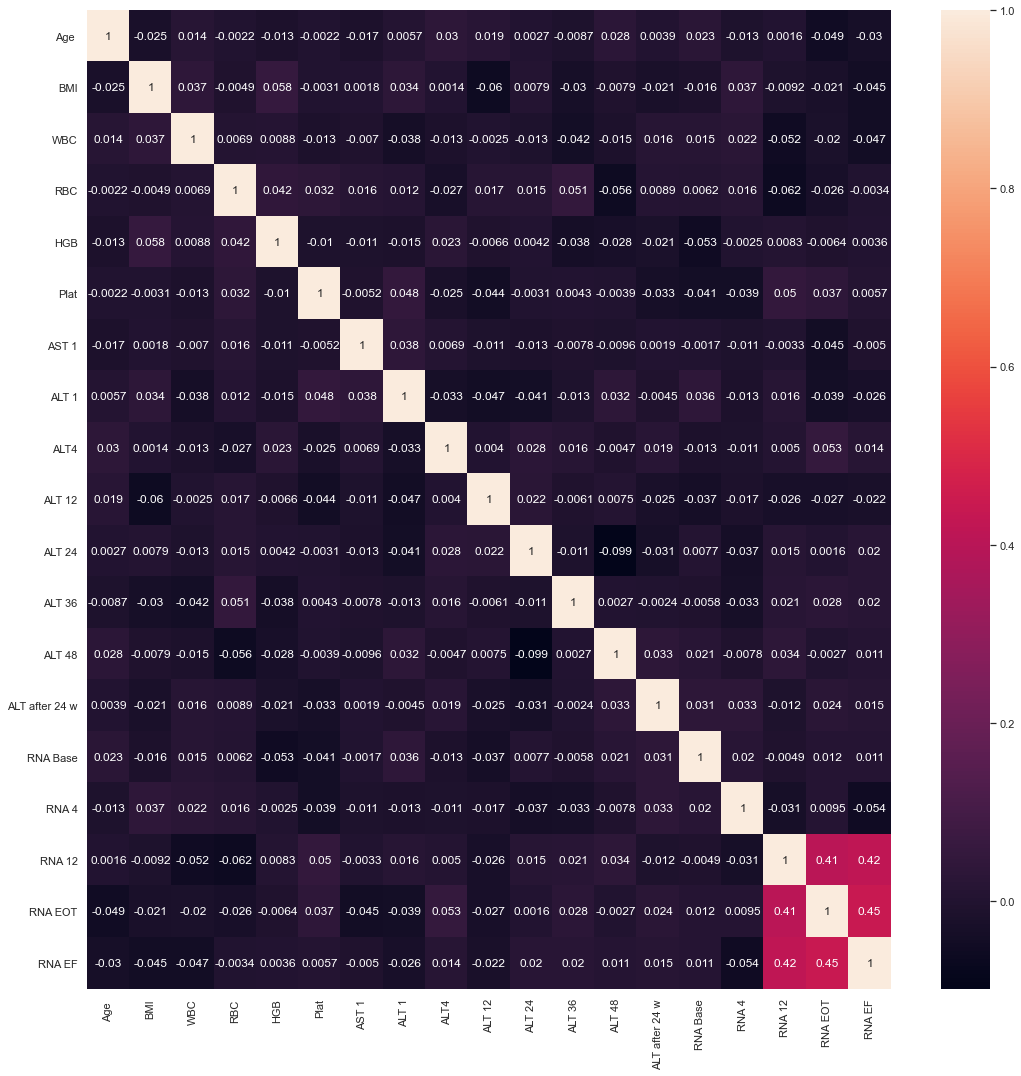

In [8]:
# Correlation Heatmap Matrix
sns.set(rc={'figure.figsize':(18,18)})
sns.heatmap(hc1.corr(),annot=True)
plt.show()

### Violin plot for BMI with hepatitis stages

<AxesSubplot:xlabel='BMI', ylabel='Baselinehistological staging'>

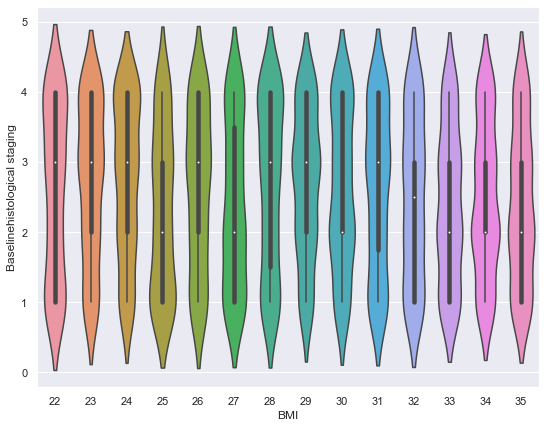

In [9]:
from matplotlib import pyplot
fig,ax=pyplot.subplots(figsize=(9,7))
sns.violinplot(ax=ax,x=hc["BMI"],y=hc["Baselinehistological staging"])

In [10]:
x=hc.iloc[:,:-1]
y=hc.iloc[:,-1]

In [11]:
x

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading
0,56,1,35,1,0,0,0,1,1,1,...,81,5,5,5,655330,634536,288194,5,5,13
1,46,1,29,0,1,1,0,1,1,0,...,113,57,123,44,40620,538635,637056,336804,31085,4
2,57,1,33,1,1,1,1,0,0,0,...,116,5,5,5,571148,661346,5,735945,558829,4
3,49,0,33,0,1,0,1,0,1,0,...,88,48,77,33,1041941,449939,585688,744463,582301,10
4,59,1,32,0,0,1,0,1,1,1,...,120,94,90,30,660410,738756,3731527,338946,242861,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44,1,29,0,1,1,1,0,0,0,...,127,63,44,45,387795,55938,5,5,5,15
1381,55,1,34,0,1,1,0,0,0,0,...,108,97,64,41,481378,152961,393339,73574,236273,10
1382,42,1,26,1,1,0,0,0,1,0,...,116,87,39,24,612664,572756,806109,343719,160457,6
1383,52,1,29,1,0,0,1,1,1,0,...,47,48,81,43,139872,76161,515730,2460,696074,15


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from numpy import mean
from numpy import absolute
from numpy import sqrt

In [15]:
# KFold cross-validation for Decison tree
cvd=KFold(n_splits=10, random_state=1, shuffle=True)
model=DecisionTreeClassifier()
scores=cross_val_score(model,x,y,scoring='accuracy',cv=cvd,n_jobs=-1)
mean(absolute(scores))

0.22887602961109374

In [16]:
scores

array([0.25179856, 0.25899281, 0.18705036, 0.22302158, 0.23021583,
       0.23188406, 0.26811594, 0.20289855, 0.18115942, 0.25362319])

In [17]:
# KFold cross-validation for Random Forest
cvr=KFold(n_splits=10, random_state=1, shuffle=True)
model=RandomForestClassifier()
scores=cross_val_score(model,x,y,scoring='accuracy',cv=cvr,n_jobs=-1)
mean(absolute(scores))

0.24264935877385047

## Feature selection methods

### 1.Sequencial Feature Selection method/ Forward selection method

In [18]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Sequential Forward Selection(sfs)
sfs = SFS(DecisionTreeClassifier(),
          k_features=15,
          forward=True,
          floating=False,
          scoring = 'accuracy',
          cv = cvd)
sfs

SequentialFeatureSelector(cv=KFold(n_splits=10, random_state=1, shuffle=True),
                          estimator=DecisionTreeClassifier(), k_features=15,
                          scoring='accuracy')

### Selected features for Decision Tree

In [24]:
sfs.fit(x, y)
sfs.k_feature_names_     # to get the final set of features

('Gender',
 'Fever',
 'Headache ',
 'Diarrhea ',
 'Fatigue & generalized bone ache ',
 'Jaundice ',
 'Epigastric pain ',
 'WBC',
 'HGB',
 'ALT 1',
 'ALT4',
 'ALT 24',
 'ALT 48',
 'RNA EF',
 'Baseline histological Grading')

In [19]:
# Frame of selected variables
hcd=x[['Gender',
 'Fever',
 'Headache ',
 'Diarrhea ',
 'Fatigue & generalized bone ache ',
 'Jaundice ',
 'Epigastric pain ',
 'WBC',
 'HGB',
 'ALT 1',
 'ALT4',
 'ALT 24',
 'ALT 48',
 'RNA EF',
 'Baseline histological Grading']]
hcd

,Gender,Fever,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,HGB,ALT 1,ALT4,ALT 24,ALT 48,RNA EF,Baseline histological Grading
0,1,1,0,0,1,1,1,7425,14,84,52,81,5,5,13
1,1,0,1,0,1,1,0,12101,10,123,95,113,123,31085,4
2,1,1,1,1,0,0,0,4178,12,49,95,116,5,558829,4
3,0,0,0,1,0,1,0,6490,10,64,109,88,77,582301,10
4,1,0,1,0,1,1,1,3661,11,104,67,120,90,242861,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,1,0,1,1,0,0,0,7044,15,59,78,127,44,5,15
1381,1,0,1,0,0,0,0,6207,10,102,65,108,64,236273,10
1382,1,1,0,0,0,1,0,4913,14,93,123,116,39,160457,6
1383,1,1,0,1,1,1,0,7257,10,97,104,47,81,696074,15


In [24]:
# Splitting of dataset as training and test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
x_traind,x_testd,y_traind,y_testd=train_test_split(hcd,y,test_size=0.35)

### A. Decision Tree Regression

In [21]:
cf=DecisionTreeClassifier()
dt=cf.fit(x_traind,y_traind)
y_pred=cf.predict(x_testd)
y_pred

array([1, 2, 1, 1, 1, 2, 1, 4, 1, 3, 4, 4, 2, 1, 4, 4, 1, 2, 2, 2, 4, 2,
       4, 1, 3, 2, 3, 2, 4, 3, 2, 3, 3, 3, 4, 2, 2, 1, 3, 2, 3, 2, 3, 2,
       4, 2, 4, 2, 4, 1, 2, 4, 4, 3, 2, 2, 2, 3, 3, 2, 1, 3, 3, 4, 1, 4,
       1, 1, 2, 1, 1, 3, 1, 2, 1, 2, 2, 2, 3, 2, 2, 2, 1, 3, 2, 4, 4, 1,
       3, 2, 1, 2, 2, 1, 3, 1, 4, 3, 4, 1, 4, 2, 2, 4, 4, 3, 4, 1, 1, 4,
       2, 3, 4, 4, 3, 2, 1, 1, 2, 4, 3, 3, 3, 4, 3, 1, 1, 4, 3, 1, 2, 3,
       1, 1, 3, 4, 4, 2, 3, 2, 1, 3, 1, 3, 3, 2, 1, 1, 2, 4, 2, 1, 4, 2,
       1, 1, 3, 3, 1, 4, 2, 4, 1, 3, 3, 2, 3, 2, 2, 4, 1, 3, 3, 3, 2, 1,
       1, 4, 4, 4, 2, 2, 1, 4, 2, 2, 1, 3, 4, 2, 4, 3, 2, 1, 1, 4, 3, 3,
       3, 4, 3, 1, 2, 4, 4, 4, 2, 1, 2, 3, 3, 4, 4, 2, 2, 2, 3, 3, 2, 4,
       3, 2, 1, 2, 2, 3, 4, 4, 2, 4, 4, 3, 4, 2, 3, 4, 4, 2, 3, 1, 3, 4,
       4, 2, 4, 1, 1, 1, 1, 1, 3, 1, 4, 4, 1, 2, 2, 1, 4, 4, 3, 4, 3, 4,
       3, 3, 2, 2, 3, 1, 3, 2, 4, 2, 2, 3, 2, 4, 1, 1, 2, 4, 4, 1, 3, 2,
       2, 4, 1, 4, 2, 4, 2, 2, 3, 3, 2, 3, 3, 1, 4,

In [25]:
confusion_matrix(y_testd,y_pred)

array([[30, 38, 28, 30],
       [29, 27, 33, 32],
       [28, 41, 32, 28],
       [29, 25, 22, 33]], dtype=int64)

In [26]:
accuracy_score(y_testd,y_pred)

0.2515463917525773

### 2. Backward feature elimination method

In [27]:
sfs1 = SFS(RandomForestClassifier(),
          k_features=15,
          forward=False,
          floating=False,
          scoring = 'accuracy',
          cv = cvr)
sfs1

SequentialFeatureSelector(cv=KFold(n_splits=10, random_state=1, shuffle=True),
                          estimator=RandomForestClassifier(), forward=False,
                          k_features=15, scoring='accuracy')

### Selected features for Random Forest

In [34]:
sfs1.fit(x, y)
sfs1.k_feature_names_

('Gender',
 'Fever',
 'Headache ',
 'Diarrhea ',
 'Fatigue & generalized bone ache ',
 'Epigastric pain ',
 'RBC',
 'HGB',
 'ALT 1',
 'ALT4',
 'ALT 12',
 'ALT after 24 w',
 'RNA 4',
 'RNA 12',
 'RNA EF')

In [28]:
hcr=x[['Gender',
 'Fever',
 'Headache ',
 'Diarrhea ',
 'Fatigue & generalized bone ache ',
 'Epigastric pain ',
 'RBC',
 'HGB',
 'ALT 1',
 'ALT4',
 'ALT 12',
 'ALT after 24 w',
 'RNA 4',
 'RNA 12',
 'RNA EF']]
hcr

,Gender,Fever,Headache,Diarrhea,Fatigue & generalized bone ache,Epigastric pain,RBC,HGB,ALT 1,ALT4,ALT 12,ALT after 24 w,RNA 4,RNA 12,RNA EF
0,1,1,0,0,1,1,4248807,14,84,52,109,5,634536,288194,5
1,1,0,1,0,1,0,4429425,10,123,95,75,44,538635,637056,31085
2,1,1,1,1,0,0,4621191,12,49,95,107,5,661346,5,558829
3,0,0,0,1,0,0,4794631,10,64,109,80,33,449939,585688,582301
4,1,0,1,0,1,1,4606375,11,104,67,48,30,738756,3731527,242861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,1,0,1,1,0,0,4957174,15,59,78,106,45,55938,5,5
1381,1,0,1,0,0,0,4636951,10,102,65,99,41,152961,393339,236273
1382,1,1,0,0,0,0,4122038,14,93,123,61,24,572756,806109,160457
1383,1,1,0,1,1,0,4241990,10,97,104,74,43,76161,515730,696074


In [37]:
# Splitting of dataset as training and test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
x_trainr,x_testr,y_trainr,y_testr=train_test_split(hcr,y,test_size=0.30)

### B. Random Forest

In [38]:
cfr=RandomForestClassifier()
dt=cfr.fit(x_trainr,y_trainr)
y_predr=cfr.predict(x_testr)
y_predr

array([1, 2, 4, 3, 2, 3, 3, 4, 1, 4, 2, 2, 1, 4, 1, 4, 3, 1, 1, 3, 3, 1,
       1, 2, 3, 4, 1, 3, 3, 2, 1, 1, 3, 1, 4, 4, 3, 3, 2, 1, 3, 4, 4, 2,
       1, 1, 2, 4, 4, 4, 4, 4, 4, 2, 4, 1, 4, 3, 4, 1, 2, 3, 2, 2, 1, 4,
       4, 4, 4, 3, 4, 1, 3, 4, 4, 1, 2, 4, 3, 2, 4, 2, 2, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 2, 3, 3, 4, 3, 4, 3, 4, 4, 1, 2, 4, 1, 4, 2, 4, 4,
       1, 1, 2, 4, 4, 4, 2, 4, 2, 1, 4, 1, 1, 1, 3, 4, 3, 2, 4, 1, 3, 1,
       2, 3, 3, 1, 3, 2, 2, 4, 1, 2, 1, 2, 4, 1, 2, 3, 2, 4, 3, 4, 2, 1,
       2, 3, 3, 2, 1, 4, 2, 4, 4, 2, 2, 2, 1, 2, 1, 3, 4, 4, 3, 2, 4, 3,
       4, 1, 1, 4, 2, 4, 1, 1, 2, 3, 3, 4, 4, 3, 2, 4, 3, 3, 1, 3, 3, 4,
       1, 4, 4, 3, 4, 2, 2, 4, 2, 1, 2, 3, 4, 4, 4, 1, 1, 1, 3, 4, 3, 3,
       4, 4, 3, 1, 1, 1, 2, 1, 4, 2, 4, 4, 1, 4, 2, 2, 4, 2, 1, 4, 1, 1,
       3, 4, 2, 4, 3, 2, 1, 1, 4, 3, 3, 4, 3, 1, 4, 2, 4, 1, 4, 3, 1, 3,
       3, 1, 2, 2, 1, 2, 4, 4, 4, 4, 2, 4, 3, 2, 2, 1, 4, 4, 1, 4, 3, 4,
       3, 1, 3, 4, 3, 1, 3, 4, 1, 4, 4, 4, 3, 1, 4,

In [39]:
confusion_matrix(y_testr,y_predr)

array([[26, 26, 28, 28],
       [20, 20, 21, 38],
       [28, 22, 25, 31],
       [18, 23, 19, 43]], dtype=int64)

In [40]:
accuracy_score(y_testr,y_predr)

0.27403846153846156

### C. Support Vector Machine

In [41]:
from sklearn import svm
x_train,x_test,y_train,y_test=train_test_split(hc1,y,test_size=0.35)

In [43]:
cls=svm.SVC(kernel="linear")
cls.fit(x_train,y_train)
pred=cls.predict(x_test)
pred

array([4, 4, 4, 3, 3, 1, 3, 2, 2, 2, 3, 4, 4, 2, 2, 4, 4, 3, 3, 3, 3, 1,
       3, 3, 4, 2, 4, 1, 4, 4, 3, 1, 3, 4, 4, 1, 3, 4, 1, 4, 3, 1, 4, 4,
       4, 3, 3, 1, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 1, 2, 3, 1, 4, 1,
       3, 1, 3, 1, 4, 4, 1, 3, 4, 4, 3, 3, 1, 4, 2, 3, 2, 3, 3, 4, 1, 4,
       3, 3, 4, 4, 1, 4, 4, 3, 3, 3, 3, 3, 4, 2, 1, 1, 4, 4, 3, 2, 3, 3,
       1, 4, 4, 3, 4, 3, 3, 1, 2, 1, 1, 4, 4, 4, 1, 3, 3, 2, 3, 4, 4, 4,
       4, 4, 4, 4, 1, 3, 3, 2, 3, 2, 2, 4, 1, 4, 3, 2, 3, 3, 2, 1, 4, 4,
       1, 3, 4, 3, 3, 4, 4, 4, 3, 2, 4, 1, 4, 1, 3, 3, 3, 4, 2, 4, 4, 3,
       4, 2, 4, 4, 3, 3, 4, 4, 4, 3, 4, 4, 1, 3, 3, 4, 3, 2, 4, 3, 3, 1,
       1, 3, 1, 3, 4, 1, 1, 2, 1, 4, 4, 2, 4, 3, 4, 4, 3, 1, 2, 4, 4, 4,
       2, 4, 4, 1, 3, 2, 4, 4, 4, 3, 4, 1, 3, 3, 1, 3, 4, 4, 1, 2, 3, 4,
       2, 3, 2, 2, 4, 1, 4, 3, 3, 3, 2, 3, 4, 4, 2, 3, 4, 1, 1, 4, 1, 3,
       4, 2, 4, 4, 1, 4, 4, 2, 4, 3, 4, 1, 4, 4, 4, 2, 4, 3, 3, 1, 3, 2,
       4, 3, 3, 4, 2, 4, 4, 4, 1, 4, 4, 3, 3, 3, 4,

In [ ]:
confusion_matrix(y_test,pred)

In [ ]:
accuracy_score(y_test,pred)